In [5428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [5429]:
data_file = "conso.txt"

In [5430]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [5431]:
text='test'
filename='text.txt'
#save_text(filename)

In [5432]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [5433]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


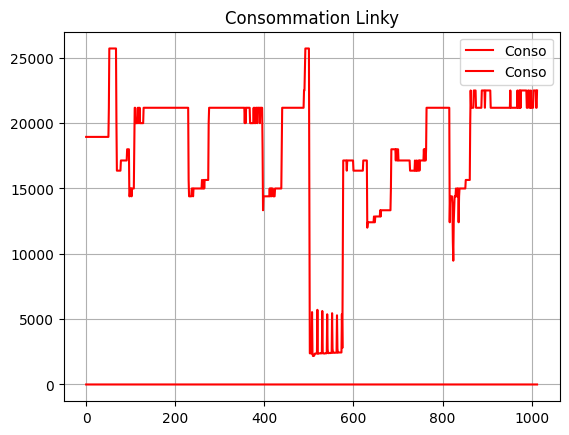

In [5434]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [5435]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [5436]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112516 entries, 0 to 112515
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  112516 non-null  int64  
 1   kWh       112516 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [5437]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
112511,23765,0.15
112512,23934,0.15
112513,23486,0.15
112514,24169,0.15


In [5438]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
112511,23765,0.15,23.765,151.483274,2669307623
112512,23934,0.15,23.934,150.413638,2669331557
112513,23486,0.15,23.486,153.282807,2669355043
112514,24169,0.15,24.169,148.951136,2669379212


In [5439]:
# index dernier echantillon
l=len(conso_data)-1
l

112515

In [5440]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2669403619000

In [5441]:
old

False

In [5442]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 37, 56, 271052)

In [5443]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112516 entries, 0 to 112515
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   112516 non-null  int64         
 1   kWh        112516 non-null  float64       
 2   sec        112516 non-null  float64       
 3   Wh         112516 non-null  float64       
 4   cumul(ms)  112516 non-null  int64         
 5   dates      112516 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 5.2 MB


In [5444]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:38:22.560052,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:38:48.803052,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:39:14.688052,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:39:40.442052,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:40:06.216052,07/03/2024
...,...,...,...,...,...,...,...
112511,23765,0.15,23.765,151.483274,2669307623,2024-04-06 23:06:23.894052,06/04/2024
112512,23934,0.15,23.934,150.413638,2669331557,2024-04-06 23:06:47.828052,06/04/2024
112513,23486,0.15,23.486,153.282807,2669355043,2024-04-06 23:07:11.314052,06/04/2024
112514,24169,0.15,24.169,148.951136,2669379212,2024-04-06 23:07:35.483052,06/04/2024


In [5445]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:38:22.560052   
 
          days  
 0  07/03/2024  ,
         Interval   kWh     sec          Wh   cumul(ms)  \
 112515     24407  0.15  24.407  147.498668  2669403619   
 
                             dates        days  
 112515 2024-04-06 23:07:59.890052  06/04/2024  )

In [5446]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('06/04/2024', 4, 2024)

In [5447]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
109229,27144,0.13,27.144,132.625995,2586135505,2024-04-06 00:00:11.776052,06/04/2024
109230,27129,0.13,27.129,132.699325,2586162634,2024-04-06 00:00:38.905052,06/04/2024
109231,26594,0.14,26.594,135.368880,2586189228,2024-04-06 00:01:05.499052,06/04/2024
109232,25936,0.14,25.936,138.803208,2586215164,2024-04-06 00:01:31.435052,06/04/2024
109233,26089,0.14,26.089,137.989191,2586241253,2024-04-06 00:01:57.524052,06/04/2024
...,...,...,...,...,...,...,...
112511,23765,0.15,23.765,151.483274,2669307623,2024-04-06 23:06:23.894052,06/04/2024
112512,23934,0.15,23.934,150.413638,2669331557,2024-04-06 23:06:47.828052,06/04/2024
112513,23486,0.15,23.486,153.282807,2669355043,2024-04-06 23:07:11.314052,06/04/2024
112514,24169,0.15,24.169,148.951136,2669379212,2024-04-06 23:07:35.483052,06/04/2024


In [5448]:
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [5449]:

mean = conso_df['conso'].mean()
mean


3.5337307692307687

In [5450]:
grouped.count()/1000

,kWh
days,
07/03/2024,3.164
08/03/2024,3.752
09/03/2024,3.082
10/03/2024,3.535
11/03/2024,4.549
12/03/2024,3.546
13/03/2024,3.533
14/03/2024,3.665
15/03/2024,3.560


In [5451]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.629548
dtype: float64

In [5513]:
filename='conso_par_jour.csv'
df = grouped.count()/1000
df.to_csv(filename)
filename='../conso_par_jour.csv'
df.to_csv(filename)

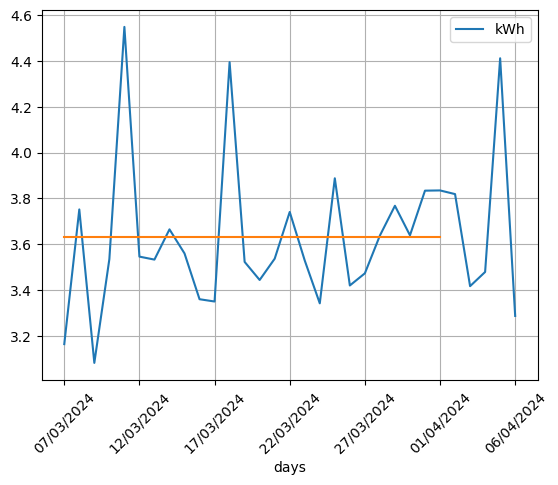

In [5453]:
df.plot()#kind='bar')
plt.plot((0,len(conso_graph)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [5454]:
#manuel
#day = '11/03/2024'


In [5455]:
# conso day
conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

3287

In [5456]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
109229,27144,0.13,27.144,132.625995,2586135505,2024-04-06 00:00:11.776052,06/04/2024
109230,27129,0.13,27.129,132.699325,2586162634,2024-04-06 00:00:38.905052,06/04/2024
109231,26594,0.14,26.594,135.368880,2586189228,2024-04-06 00:01:05.499052,06/04/2024
109232,25936,0.14,25.936,138.803208,2586215164,2024-04-06 00:01:31.435052,06/04/2024
109233,26089,0.14,26.089,137.989191,2586241253,2024-04-06 00:01:57.524052,06/04/2024
...,...,...,...,...,...,...,...
112511,23765,0.15,23.765,151.483274,2669307623,2024-04-06 23:06:23.894052,06/04/2024
112512,23934,0.15,23.934,150.413638,2669331557,2024-04-06 23:06:47.828052,06/04/2024
112513,23486,0.15,23.486,153.282807,2669355043,2024-04-06 23:07:11.314052,06/04/2024
112514,24169,0.15,24.169,148.951136,2669379212,2024-04-06 23:07:35.483052,06/04/2024


In [5512]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [5458]:
df

,kWh
days,
07/03/2024,3.164
08/03/2024,3.752
09/03/2024,3.082
10/03/2024,3.535
11/03/2024,4.549
12/03/2024,3.546
13/03/2024,3.533
14/03/2024,3.665
15/03/2024,3.560


In [5459]:
conso_day.head(1).dates, conso_day.tail(1).dates


(109229   2024-04-06 00:00:11.776052
 Name: dates, dtype: datetime64[ns],
 112515   2024-04-06 23:07:59.890052
 Name: dates, dtype: datetime64[ns])

In [5460]:
conso_day.loc[:,'dates']

109229   2024-04-06 00:00:11.776052
109230   2024-04-06 00:00:38.905052
109231   2024-04-06 00:01:05.499052
109232   2024-04-06 00:01:31.435052
109233   2024-04-06 00:01:57.524052
                    ...            
112511   2024-04-06 23:06:23.894052
112512   2024-04-06 23:06:47.828052
112513   2024-04-06 23:07:11.314052
112514   2024-04-06 23:07:35.483052
112515   2024-04-06 23:07:59.890052
Name: dates, Length: 3287, dtype: datetime64[ns]

In [5461]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_14100\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:11,27144,0.13,27.144,132.625995,2586135505,2024-04-06 00:00:11.776052,06/04/2024
0:0:38,27129,0.13,27.129,132.699325,2586162634,2024-04-06 00:00:38.905052,06/04/2024
0:1:5,26594,0.14,26.594,135.368880,2586189228,2024-04-06 00:01:05.499052,06/04/2024
0:1:31,25936,0.14,25.936,138.803208,2586215164,2024-04-06 00:01:31.435052,06/04/2024
0:1:57,26089,0.14,26.089,137.989191,2586241253,2024-04-06 00:01:57.524052,06/04/2024
...,...,...,...,...,...,...,...
23:6:23,23765,0.15,23.765,151.483274,2669307623,2024-04-06 23:06:23.894052,06/04/2024
23:6:47,23934,0.15,23.934,150.413638,2669331557,2024-04-06 23:06:47.828052,06/04/2024
23:7:11,23486,0.15,23.486,153.282807,2669355043,2024-04-06 23:07:11.314052,06/04/2024


In [5462]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('23:08:17', 3.287)

In [5463]:
df['kWh']

heure
0:0:11     0.13
0:0:38     0.13
0:1:5      0.14
0:1:31     0.14
0:1:57     0.14
           ... 
23:6:23    0.15
23:6:47    0.15
23:7:11    0.15
23:7:35    0.15
23:7:59    0.15
Name: kWh, Length: 3287, dtype: float64

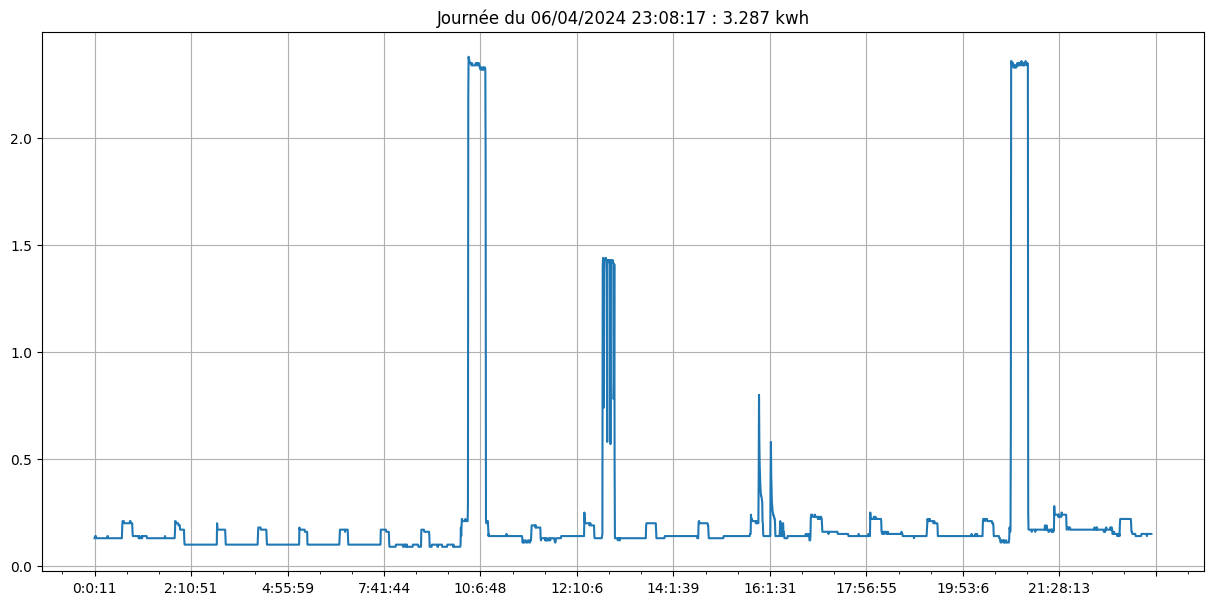

In [5464]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [5465]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]

In [5466]:
df['power']

heure
0:0:11     0.13
0:0:38     0.13
0:1:5      0.14
0:1:31     0.14
0:1:57     0.14
           ... 
23:6:23    0.15
23:6:47    0.15
23:7:11    0.15
23:7:35    0.15
23:7:59    0.15
Name: power, Length: 3287, dtype: float64

<Axes: xlabel='heure'>

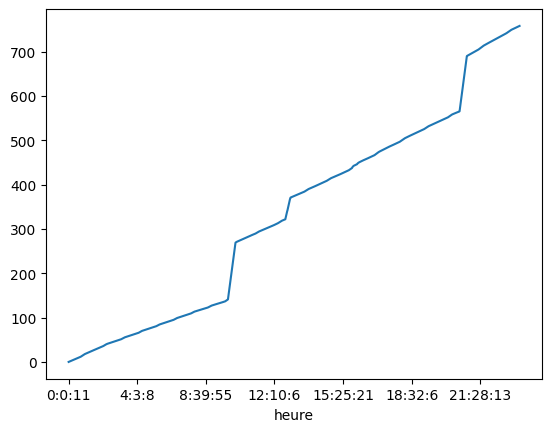

In [5467]:
evo=df['power'].cumsum()
evo.plot()

149

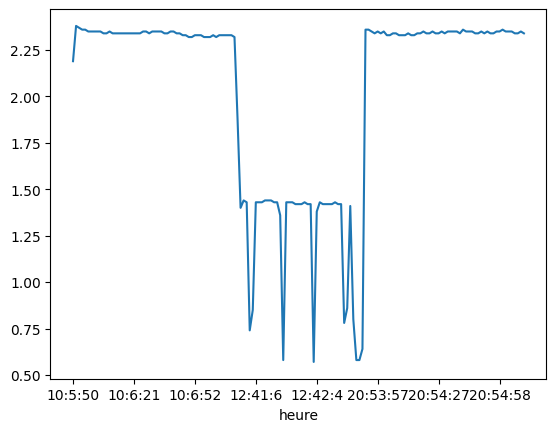

In [5468]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

2439

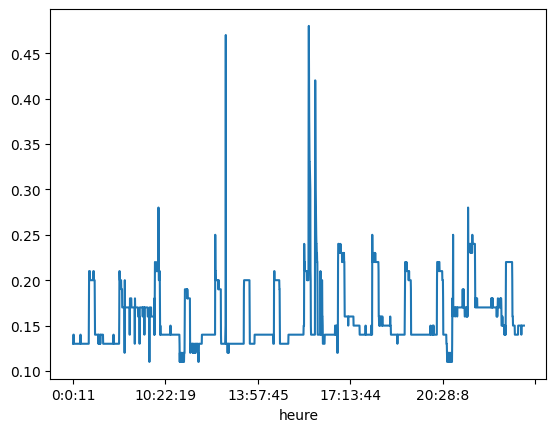

In [5469]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

3138

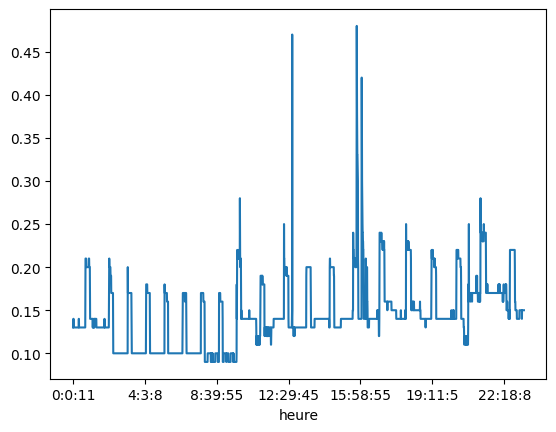

In [5470]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [5471]:
time = conso_data['dates']
time


0        2024-03-07 01:38:22.560052
1        2024-03-07 01:38:48.803052
2        2024-03-07 01:39:14.688052
3        2024-03-07 01:39:40.442052
4        2024-03-07 01:40:06.216052
                    ...            
112511   2024-04-06 23:06:23.894052
112512   2024-04-06 23:06:47.828052
112513   2024-04-06 23:07:11.314052
112514   2024-04-06 23:07:35.483052
112515   2024-04-06 23:07:59.890052
Name: dates, Length: 112516, dtype: datetime64[ns]

In [5472]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [5473]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [5474]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

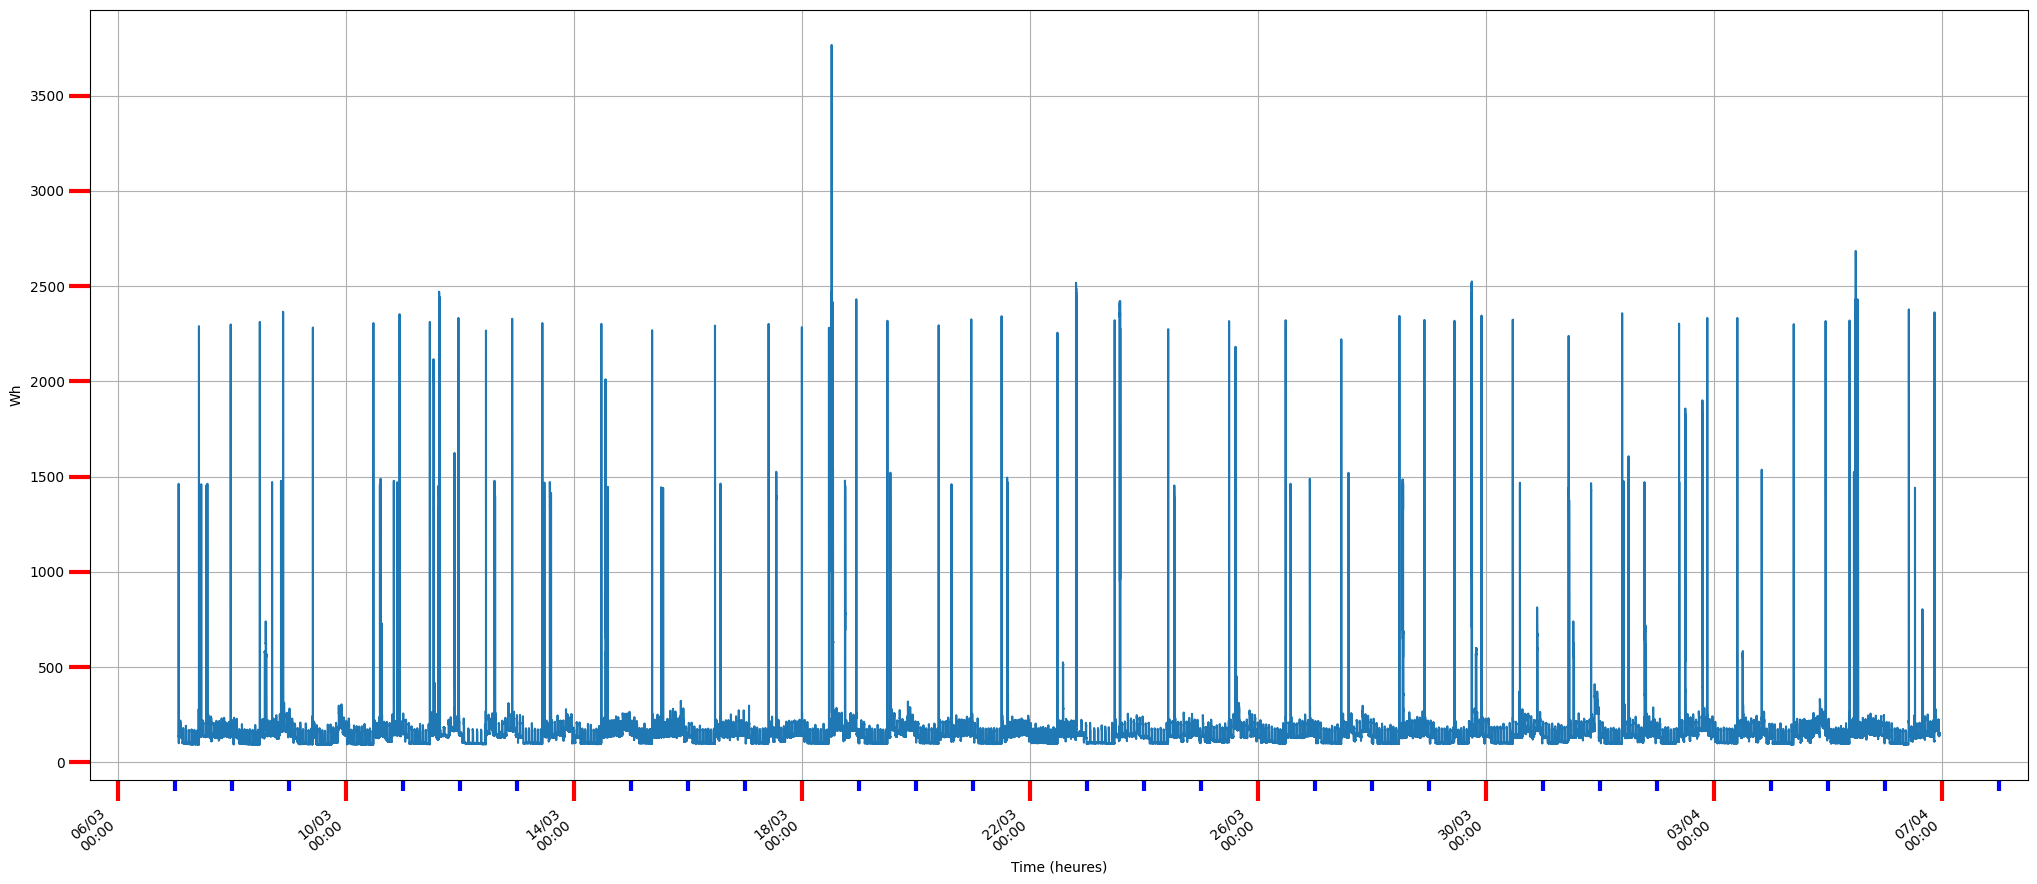

In [5475]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [5476]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
112515,24407,0.15,24.407,147.498668,2669403619,2024-04-06 23:07:59.890052,06/04/2024


In [5477]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2669403619000

# Slice of last 1 kWh

In [5478]:
l = len(conso_data)  # total watt consommés
l

112516

In [5479]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(112516, 1000)

In [5480]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [5481]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 111516     22686  0.16  22.686  158.688178  2647988434   
 111517     22912  0.16  22.912  157.122905  2648011346   
 111518     22754  0.16  22.754  158.213940  2648034100   
 111519     22991  0.16  22.991  156.583011  2648057091   
 111520     22768  0.16  22.768  158.116655  2648079859   
 ...          ...   ...     ...         ...         ...   
 112511     23765  0.15  23.765  151.483274  2669307623   
 112512     23934  0.15  23.934  150.413638  2669331557   
 112513     23486  0.15  23.486  153.282807  2669355043   
 112514     24169  0.15  24.169  148.951136  2669379212   
 112515     24407  0.15  24.407  147.498668  2669403619   
 
                             dates        days  
 111516 2024-04-06 17:11:04.705052  06/04/2024  
 111517 2024-04-06 17:11:27.617052  06/04/2024  
 111518 2024-04-06 17:11:50.371052  06/04/2024  
 111519 2024-04-06 17:12:13.362052  06/04/2024  
 111520 2024-04-06 17:12:36.130052  06

In [5482]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [5483]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [5484]:
cumtime_end,cumtime_start

(2669403619000, 2648011346000)

In [5485]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

21392273000

In [5486]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 6, 23, 8, 48, 572790),
 datetime.datetime(2024, 4, 6, 17, 12, 16, 299790),
 '06/04/2024 23:07:59')

In [5487]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:38:22.560052,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:38:48.803052,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:39:14.688052,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:39:40.442052,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:40:06.216052,07/03/2024
...,...,...,...,...,...,...,...
112511,23765,0.15,23.765,151.483274,2669307623,2024-04-06 23:06:23.894052,06/04/2024
112512,23934,0.15,23.934,150.413638,2669331557,2024-04-06 23:06:47.828052,06/04/2024
112513,23486,0.15,23.486,153.282807,2669355043,2024-04-06 23:07:11.314052,06/04/2024
112514,24169,0.15,24.169,148.951136,2669379212,2024-04-06 23:07:35.483052,06/04/2024


In [5488]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('06/04/2024 17:11:27', '06/04/2024 23:07:59')

In [5489]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-06 17:11:04.705052', '2024-04-06 23:07:59.890052')

In [5490]:
k

1

In [5491]:
data.Interval.tail(1000)

111516    22686
111517    22912
111518    22754
111519    22991
111520    22768
          ...  
112511    23765
112512    23934
112513    23486
112514    24169
112515    24407
Name: Interval, Length: 1000, dtype: int64

In [5492]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(5.9549641666666675, 4.030250951691984, 5, 57, 17)

In [5493]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_14100\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [5494]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
111516,22686,0.16,22.686,158.688178,2647988434,2024-04-06 17:11:04.705052,06/04/2024,2024-04-06 17:11:04.705052
111517,22912,0.16,22.912,157.122905,2648011346,2024-04-06 17:11:27.617052,06/04/2024,2024-04-06 17:11:27.617052
111518,22754,0.16,22.754,158.213940,2648034100,2024-04-06 17:11:50.371052,06/04/2024,2024-04-06 17:11:50.371052
111519,22991,0.16,22.991,156.583011,2648057091,2024-04-06 17:12:13.362052,06/04/2024,2024-04-06 17:12:13.362052
111520,22768,0.16,22.768,158.116655,2648079859,2024-04-06 17:12:36.130052,06/04/2024,2024-04-06 17:12:36.130052
...,...,...,...,...,...,...,...,...
112511,23765,0.15,23.765,151.483274,2669307623,2024-04-06 23:06:23.894052,06/04/2024,2024-04-06 23:06:23.894052
112512,23934,0.15,23.934,150.413638,2669331557,2024-04-06 23:06:47.828052,06/04/2024,2024-04-06 23:06:47.828052
112513,23486,0.15,23.486,153.282807,2669355043,2024-04-06 23:07:11.314052,06/04/2024,2024-04-06 23:07:11.314052
112514,24169,0.15,24.169,148.951136,2669379212,2024-04-06 23:07:35.483052,06/04/2024,2024-04-06 23:07:35.483052


<Axes: >

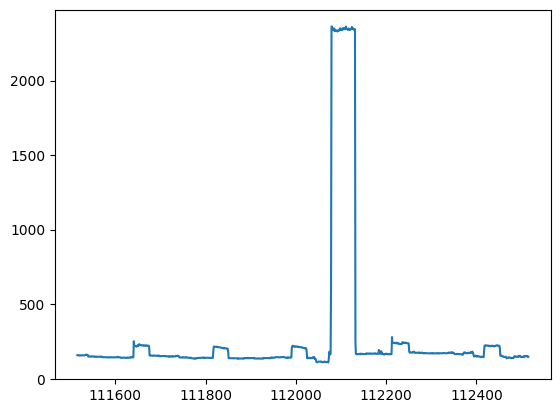

In [5510]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [5496]:
data['Wh']

111516    158.688178
111517    157.122905
111518    158.213940
111519    156.583011
111520    158.116655
             ...    
112511    151.483274
112512    150.413638
112513    153.282807
112514    148.951136
112515    147.498668
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

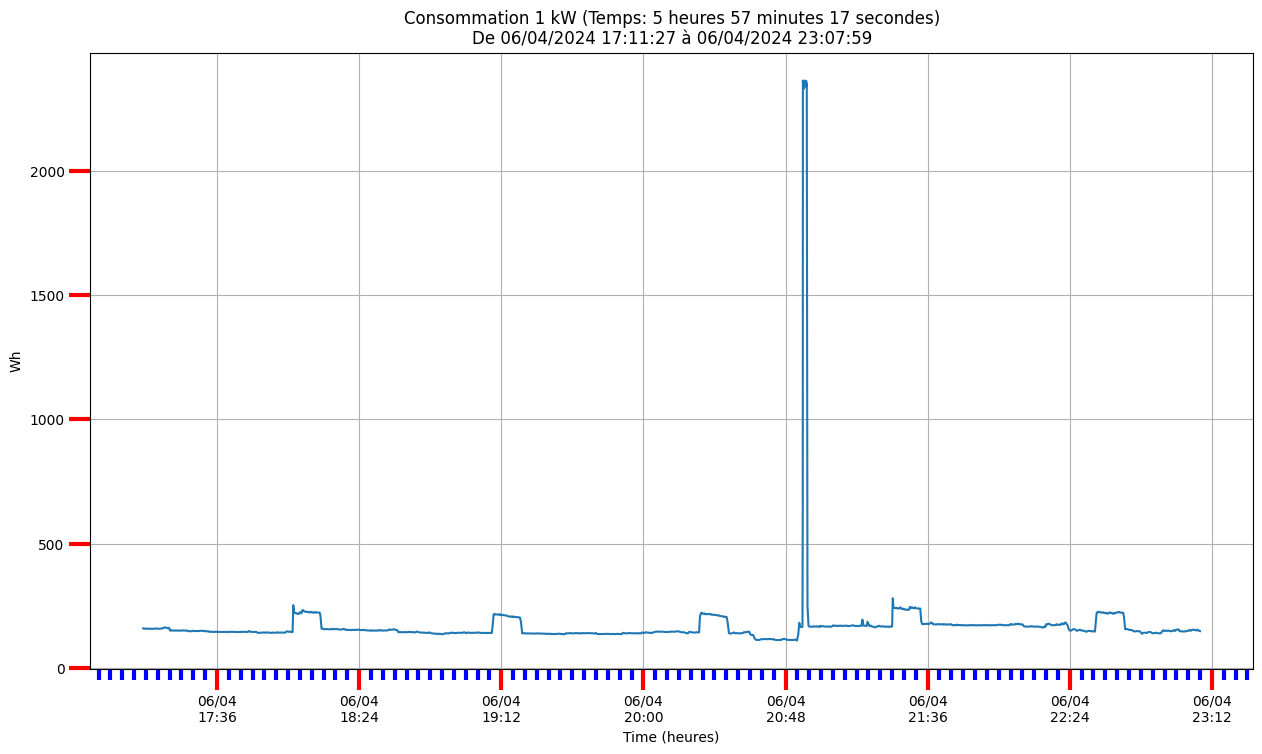

In [5511]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

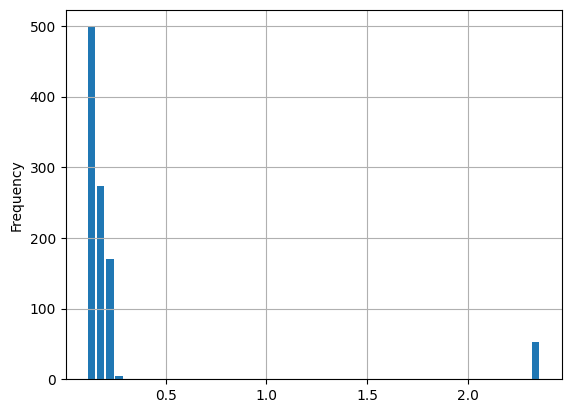

In [5498]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [5499]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
112511,23765,0.15,23.765,151.483274,2669307623,2024-04-06 23:06:23.894052,06/04/2024
112512,23934,0.15,23.934,150.413638,2669331557,2024-04-06 23:06:47.828052,06/04/2024
112513,23486,0.15,23.486,153.282807,2669355043,2024-04-06 23:07:11.314052,06/04/2024
112514,24169,0.15,24.169,148.951136,2669379212,2024-04-06 23:07:35.483052,06/04/2024
112515,24407,0.15,24.407,147.498668,2669403619,2024-04-06 23:07:59.890052,06/04/2024


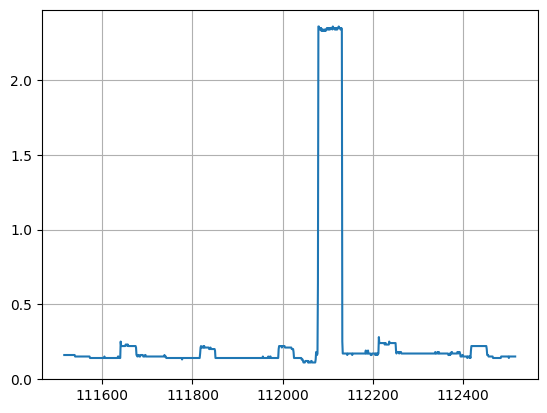

In [5500]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [5501]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(2669403619000.0, 44490.06031666667)

In [5502]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 6, 23, 8, 51, 146463),
 datetime.datetime(2024, 3, 7, 1, 38, 47, 527463))

In [5503]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(112516, 2669404, 741.5011111111111)

In [5504]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [5505]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [5506]:
732/12 # 60 jours

61.0

In [5507]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

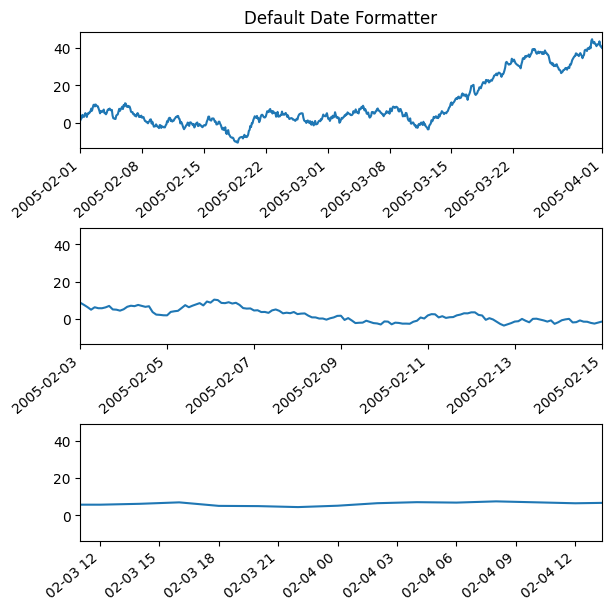

In [5508]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [5509]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)